# 05. 서포트 벡터 머신

In [2]:
# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)    
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "../"
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 5.1 선형 SVM 분류

### 5.1.1 소프트 마진 분류

In [3]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [4]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64) # iris-virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 5.2 비선형 SVM 분류

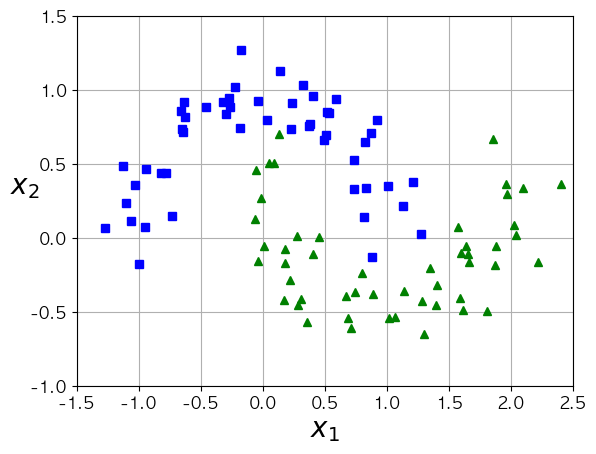

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C = 10, loss='hinge'))
])

polynomial_svm_clf.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

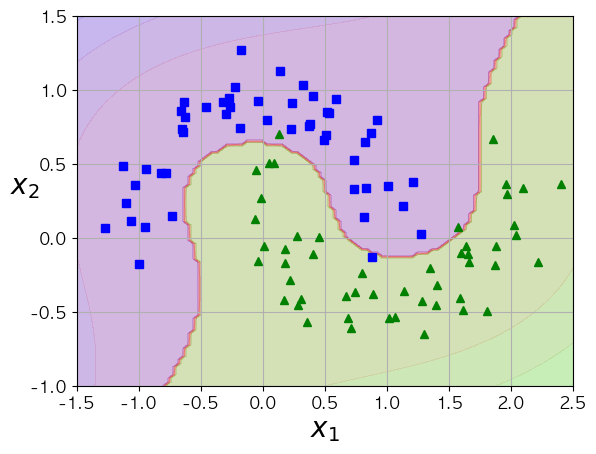

In [8]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### 5.2.1 다항식 커널

In [9]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [10]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

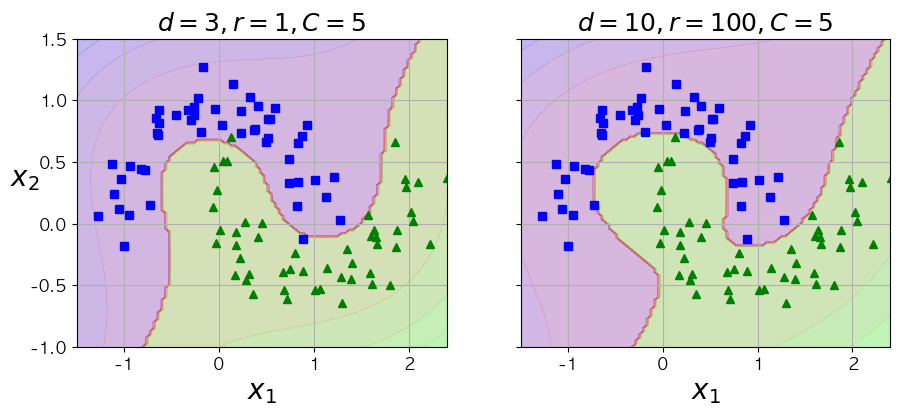

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

### 5.2.2 유사도 특성

### 5.2.3 가우시안 RBF 커널

In [12]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

### 5.2.4 계산 복잡도

## 5.3 SVM 회귀

In [13]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=0.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=0.5)

In [14]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

## 5.4 SVM 이론

## 5.5 연습문제

### 8

In [15]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [16]:
from sklearn.linear_model import SGDClassifier

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss = 'hinge', C=C, random_state=42)
svm_clf = SVC(kernel='linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


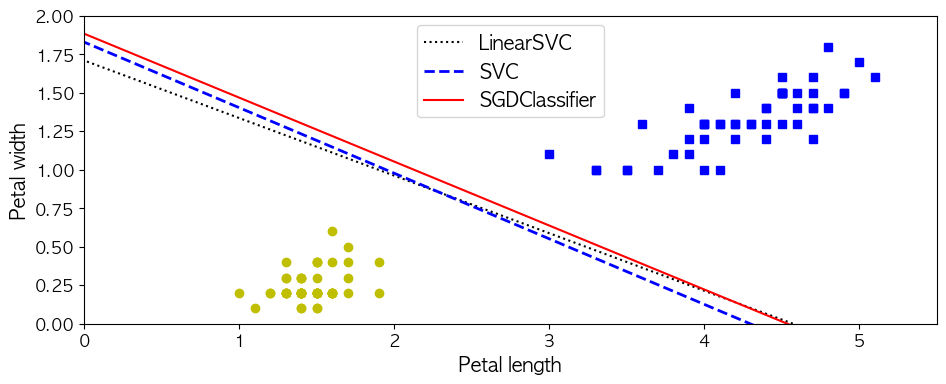

In [17]:
# 각 결정 경계의 기울기와 편향을 계산합니다
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 경계를 원본 스케일로 변환합니다
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# 세 개의 결정 경계를 모두 그립니다
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

### 9

In [18]:
import gzip

with gzip.open("../datasets/MNIST/train-images-idx3-ubyte.gz", "rb") as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 784)
with gzip.open("../datasets/MNIST/train-labels-idx1-ubyte.gz", "rb") as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open("../datasets/MNIST/t10k-images-idx3-ubyte.gz", "rb") as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 784)
with gzip.open("../datasets/MNIST/t10k-labels-idx1-ubyte.gz", "rb") as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)

In [19]:
X_train.shape

(60000, 784)

In [20]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [23]:
lin_clf.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [24]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

In [25]:
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [26]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=1.1546855321739082, gamma=0.06572651255251048; total time=   0.4s
[CV] END ....C=1.1546855321739082, gamma=0.06572651255251048; total time=   0.4s
[CV] END ....C=1.1546855321739082, gamma=0.06572651255251048; total time=   0.4s
[CV] END ......C=5.961483177365914, gamma=0.0927491873256454; total time=   0.4s
[CV] END ......C=5.961483177365914, gamma=0.0927491873256454; total time=   0.4s
[CV] END ......C=5.961483177365914, gamma=0.0927491873256454; total time=   0.4s
[CV] END ..C=2.9361254141057014, gamma=0.0016023459120648922; total time=   0.3s
[CV] END ..C=2.9361254141057014, gamma=0.0016023459120648922; total time=   0.3s
[CV] END ..C=2.9361254141057014, gamma=0.0016023459120648922; total time=   0.3s
[CV] END .....C=4.486919182986931, gamma=0.00842219998267131; total time=   0.4s
[CV] END .....C=4.486919182986931, gamma=0.00842219998267131; total time=   0.4s
[CV] END .....C=4.486919182986931, gamma=0.00842

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16c09f3a0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16c005600>},
                   verbose=2)

In [28]:
rnd_search_cv.best_estimator_

SVC(C=9.777149706591896, gamma=0.0015553424568937458)

In [29]:
rnd_search_cv.best_score_

0.8619937302572033

In [32]:
rnd_search_cv.best_params_

{'C': 9.777149706591896, 'gamma': 0.0015553424568937458}

In [45]:
svm_clf = SVC(C=rnd_search_cv.best_params_['C'], 
              gamma=rnd_search_cv.best_params_['gamma'],
              verbose=1)

In [47]:
svm_clf.fit(X_train_scaled, y_train)

[LibSVM]*
optimization finished, #iter = 828
obj = -124.717447, rho = -0.151805
nSV = 346, nBSV = 0
.*.*
optimization finished, #iter = 2776
obj = -386.551042, rho = 0.674370
nSV = 1149, nBSV = 0
.*.*
optimization finished, #iter = 2426
obj = -292.778120, rho = 0.519036
nSV = 968, nBSV = 0
.*
optimization finished, #iter = 1637
obj = -203.346828, rho = 0.300522
nSV = 709, nBSV = 0
.*.*
optimization finished, #iter = 2679
obj = -393.910731, rho = 0.406916
nSV = 967, nBSV = 0
.*.*
optimization finished, #iter = 2878
obj = -459.467508, rho = 0.609658
nSV = 1050, nBSV = 4
.*
optimization finished, #iter = 1925
obj = -215.621054, rho = 0.661669
nSV = 907, nBSV = 0
.*.*
optimization finished, #iter = 2457
obj = -395.611817, rho = 0.215154
nSV = 853, nBSV = 1
.*
optimization finished, #iter = 1915
obj = -302.325515, rho = 0.362744
nSV = 737, nBSV = 0
.*.*
optimization finished, #iter = 2574
obj = -455.055275, rho = 0.750069
nSV = 928, nBSV = 4
.*.*
optimization finished, #iter = 2280
obj = -4

SVC(C=9.777149706591896, gamma=0.0015553424568937458, verbose=1)

In [48]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9995333333333334

In [49]:
y_pred = svm_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9721

### 10

In [110]:
import pandas as pd

housing = pd.read_csv('../datasets/housing/housing.csv')
housing.drop(index=[hou])
X = housing.drop(columns=['median_house_value', 'ocean_proximity'])
y = housing['median_house_value'] / 100000

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [114]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.49747097230794174

In [115]:
np.sqrt(mse)

0.7053162214978057

In [116]:
param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=8.468028310824927, gamma=0.01923232330107012; total time=   3.7s
[CV] END .....C=8.468028310824927, gamma=0.01923232330107012; total time=   3.6s
[CV] END .....C=8.468028310824927, gamma=0.01923232330107012; total time=   3.6s
[CV] END ..C=1.6177391157838519, gamma=0.0015703215536822606; total time=   3.3s
[CV] END ..C=1.6177391157838519, gamma=0.0015703215536822606; total time=   3.4s
[CV] END ..C=1.6177391157838519, gamma=0.0015703215536822606; total time=   3.4s
[CV] END ....C=5.315096116710474, gamma=0.004419030355925616; total time=   3.4s
[CV] END ....C=5.315096116710474, gamma=0.004419030355925616; total time=   3.4s
[CV] END ....C=5.315096116710474, gamma=0.004419030355925616; total time=   3.4s
[CV] END ....C=7.786131696474178, gamma=0.007259981758370603; total time=   3.5s
[CV] END ....C=7.786131696474178, gamma=0.007259981758370603; total time=   3.5s
[CV] END ....C=7.786131696474178, gamma=0.007259

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2a09ec7c0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2a09dab60>},
                   verbose=2)

In [117]:
rnd_search_cv.best_estimator_

SVR(C=10.000663695117826, gamma=0.09834757916102312)

In [118]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5428683744617191

In [120]:
X_test_scaled

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.03030109,
        -0.37008673, -1.15508475],
       [ 0.06097472, -0.23549054,  0.11043502, ...,  0.12185077,
         0.220532  , -0.70865905],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.10241931,
         1.21539643, -0.21040155],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ...,  0.13944058,
         0.17853244,  2.80902421],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.17541702,
        -0.06821494, -0.57542978],
       [ 0.60445493, -0.66608108, -0.92113763, ...,  0.21507676,
        -0.13646421, -0.17259111]])

In [119]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values